In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style('whitegrid')

In [67]:
train_data = pd.read_csv('train_v9rqX0R.csv')

In [68]:
test_data = pd.read_csv('test_AbJTz2l.csv')

In [4]:
train_data.head(1)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 566.0+ KB


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 332.9+ KB


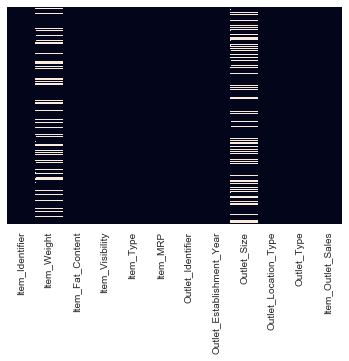

In [7]:
sb.heatmap(train_data.isnull(), yticklabels= False, cbar= False)

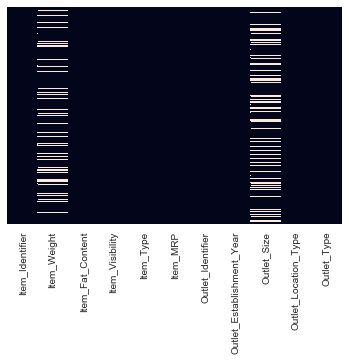

In [8]:
sb.heatmap(test_data.isnull(), yticklabels= False, cbar= False)

In [9]:
train_data['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

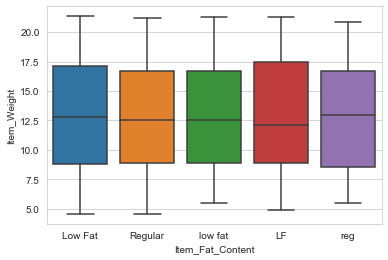

In [10]:
sb.boxplot(y = train_data['Item_Weight'], x = train_data['Item_Fat_Content'])

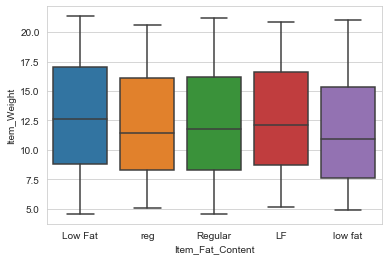

In [11]:
sb.boxplot(y = test_data['Item_Weight'], x = test_data['Item_Fat_Content'])

In [12]:
def train(x):
    Weight = x[0]
    Fat = x[1]
    if pd.isnull(Weight):
        if Fat == 'Low Fat':
            return 12.9
        elif Fat == 'Regular':
            return 12.5
        elif Fat == 'low fat':
            return 12.5
        elif Fat == 'LF':
            return 12
        elif Fat == 'reg':
            return 13.4
    else:
        return Weight

In [13]:
def test(x):
    Weight = x[0]
    Fat = x[1]
    if pd.isnull(Weight):
        if Fat == 'Low Fat':
            return 12.5
        elif Fat == 'Regular':
            return 12
        elif Fat == 'low fat':
            return 11
        elif Fat == 'LF':
            return 12.3
        elif Fat == 'reg':
            return 11.5
    else:
        return Weight

In [14]:
train_data['Item_Weight'] = train_data[['Item_Weight', 'Item_Fat_Content']].apply(train, axis = 1)

In [15]:
test_data['Item_Weight'] = train_data[['Item_Weight', 'Item_Fat_Content']].apply(test, axis = 1)

In [16]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                5681 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 332.9+ KB


In [17]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 566.0+ KB


In [18]:
train_data['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [19]:
train_data['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [20]:
train_data.fillna(value=0, axis=1, inplace= True)

In [21]:
test_data.fillna(value= 0, axis= 1,  inplace= True)

In [22]:
train_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [23]:
train_data['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT046    930
OUT035    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [24]:
dmap3 = {'OUT027':1,'OUT013':2,'OUT035':3,'OUT046':4,'OUT049':5,'OUT045':6,'OUT018':7,'OUT017':8,'OUT010':9,'OUT019':10}

In [69]:
train_data['Outlet_Identifier'] = train_data['Outlet_Identifier']
test_data['Outlet_Identifier'] = test_data['Outlet_Identifier']

In [26]:
train_data['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [27]:
dmap4 = {'Tier 3':1,'Tier 2':2,'Tier 1':3}

In [28]:
train_data['Outlet_Location_Type'] = train_data['Outlet_Location_Type'].map(dmap4)
test_data['Outlet_Location_Type'] = test_data['Outlet_Location_Type'].map(dmap4)

In [29]:
train_data['Outlet_Size'].value_counts()

Medium    2793
0         2410
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [30]:
dmap5 = {'Medium':1,0:2,'Small':3,'High':4}

In [31]:
train_data['Outlet_Size'] = train_data['Outlet_Size'].map(dmap5)
test_data['Outlet_Size'] = test_data['Outlet_Size'].map(dmap5)

In [32]:
train_data['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [33]:
dmap6 = {'Fruits and Vegetables':1,'Snack Foods':2,'Household':3,'Frozen Foods':4,'Dairy':5,'Canned':6,'Baking Goods':7,'Health and Hygiene':8,'Soft Drinks':9,'Meat':10,'Breads':11,'Hard Drinks':12,'Others':13,'Starchy Foods':14,'Breakfast':15,'Seafood':16}

In [34]:
train_data['Item_Type'] = train_data['Item_Type'].map(dmap6)
test_data['Item_Type'] = test_data['Item_Type'].map(dmap6)

In [35]:
train_data['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [36]:
dmap2 = {'Supermarket Type1':1,'Grocery Store':2,'Supermarket Type3':3,'Supermarket Type2':4}

In [37]:
train_data['Outlet_Type'] = train_data['Outlet_Type'].map(dmap2)
test_data['Outlet_Type'] = test_data['Outlet_Type'].map(dmap2)

In [38]:
train_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [39]:
dmap1 = {'Low Fat':1,'Regular':2,'LF':3,'reg':4,'low fat':5}

In [40]:
train_data['Item_Fat_Content'] = train_data['Item_Fat_Content'].map(dmap1)
test_data['Item_Fat_Content'] = test_data['Item_Fat_Content'].map(dmap1)

In [41]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int64  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int64  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int64  
 9   Outlet_Location_Type       8523 non-null   int64  
 10  Outlet_Type                8523 non-null   int64  
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(7), object(1)
memory usage: 765.8+ KB


In [42]:
train_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [55]:
X_train = train_data[['Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type']]
y_train = train_data['Item_Outlet_Sales']

In [56]:
X_test = test_data[['Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type']]

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
linR = LinearRegression()

In [59]:
linR.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
linR.coef_

array([-1.42739988e+00,  1.70710626e+01, -9.70896805e+02,  2.20887305e-01,
        1.55198346e+01, -2.77933383e+02,  1.50073099e+01, -3.72304199e+02,
       -2.10436921e+01, -1.10907393e+02])

In [61]:
linR.intercept_

-27474.31962382599

In [62]:
predict = linR.predict(X_test)

In [63]:
predict

array([2260.18006695,  903.09906672, 2671.68330236, ..., 1780.18197424,
       2872.22987314, 1166.15756609])

In [70]:
soln = {'Item_Identifier': test_data['Item_Identifier'],'Outlet_Identifier': test_data['Outlet_Identifier'], 'Item_Outlet_Sales':predict}

In [71]:
fSoln = pd.DataFrame(soln)

In [73]:
fSoln.to_csv('My_New_Solution.csv',index= False )